In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from joblib import dump, load

In [3]:
# Mounting google drive to access the dataset file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML PROJECTS/IMDB-Dataset.csv',encoding='latin-1')

In [5]:
# Creating a datframe of randomly 5000 records
df0 = df.sample(5000)

In [6]:
# Making copy of data frame
df1 = df0.copy()

In [7]:
df1.head(2)

,Ratings,Reviews,Movies,Resenhas
80825,6.0,Rum Diary (2011)If you're looking for the craz...,The Rum Diary,Rum Diary (2011) Se vocÃª estiver procurando p...
147212,10.0,"Yes, Robin Williams does steal the show. He's...",One Hour Photo,"Sim, Robin Williams rouba o show. Ele Ã© um at..."


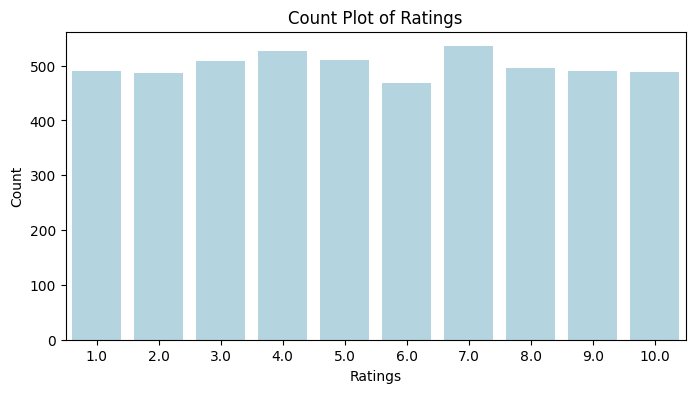

In [8]:
# Checking for class Imbalance
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='Ratings', color='lightblue')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Count Plot of Ratings')
plt.show()

In [9]:
#Checking for missing value
df1.isna().sum()

,0
Ratings,0
Reviews,0
Movies,1
Resenhas,0


In [10]:
df1['Ratings'].describe()

,Ratings
count,5000.000000
mean,5.493000
std,2.852714
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


In [11]:
df1['Movies'].nunique()

3992

In [12]:
df1['Ratings'].count()

5000

In [13]:
#Customizing stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["movie","one","film","would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'re', 'whom', 'didn', 'one', 'own', 'so', 'that', "you've", 'yours', 'now', 't', 'was', "you'll", 'you', 'movie', 'needn', 'each', "she's", 'hers', "it's", 'herself', 'yourself', 'because', 'during', 'nor', 'm', "mightn't", 'mustn', 'at', 'very', 'couldn', 'would', 'been', 'him', 'it', 'too', 'o', 'its', "weren't", 'them', 'any', 'are', 'most', 'isn', 'those', 'why', 'himself', 'as', 'ourselves', 'be', 'below', 'myself', 'do', "don't", 'y', 'their', 've', 'here', 'shall', 'ours', 'aren', 'itself', 'having', "shouldn't", 'out', 'a', 'what', 'an', 'were', 'same', 'my', 'against', 'on', 'her', 'about', 'who', "should've", 'they', 'haven', 'and', 'under', 'through', 'until', 'is', 'has', "that'll", 'ain', 'ma', 'hasn', 'but', 'while', "hasn't", 'don', 'wouldn', "haven't", 'am', 'by', 'up', 'both', "needn't", 'weren', 'there', 'did', 'shouldn', 'will', 'further', 'yourselves', 'few', 'in', 'might', 'before', "aren't", "you'd", 'could', 'won', 'then', 'only', "didn't", 'can', "isn't", 'she'

# Data Cleaning and Preprocessing Pipeline

In [14]:
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)

    return content

In [15]:
pd.options.display.max_colwidth = 500
#Data cleaning
df1['Reviews_clean']=df1['Reviews'].apply(data_cleaning)
df1.head(2)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
80825,6.0,"Rum Diary (2011)If you're looking for the craziness of later Hunter S. Thompson, you'll find shreds of it here. In a way this is a more cogent movie than say ""Fear and LoathingÂ "" but it's also a bit prosaic beneath the wilder stuff that peppers the surface. Johnny Depp stars and runs the show in his usual strong if uninspired way as a new, hard-drinking reporter with a failing English language newspaper in Puerto Rico.There is a true surface here that's pretty amazing--the cars, the low dow...",The Rum Diary,"Rum Diary (2011) Se vocÃª estiver procurando pela loucura de Hunter S. Thompson, vocÃª encontrarÃ¡ fragmentos aqui. De certa forma, este Ã© um filme mais convincente do que dizer ""Medo e repugnÃ¢ncia ..."", mas tambÃ©m Ã© um pouco prosaico sob as coisas mais selvagens que apimentam a superfÃ­cie. Johnny Depp estrelou e dirigiu o programa da maneira habitual, forte e sem inspiraÃ§Ã£o, como um novo repÃ³rter que bebe muito com um jornal falho em inglÃªs em Porto Rico. HÃ¡ uma superfÃ­cie verdad...",rum diary looking craziness later hunter thompson find shreds way cogent say fear loathingâ also bit prosaic beneath wilder stuff peppers surface johnny depp stars runs show usual strong uninspired way new hard drinking reporter failing english language newspaper puerto rico true surface pretty amazing cars low rot apartments racism rich white americans indigenous puerto ricans depth expect want slim however even though pieces play great drama charming troubled writer land filled prejudice v...
147212,10.0,"Yes, Robin Williams does steal the show. He's an underrated actor, who, given a good script can deliver a mind boggling performance. That's exactly what One hour photo is, a good script with brilliant performances. The whole cast does an excellent job of showing how the events of one deranged man can impact the lives of many. Let's get one thing straight, though, this not a mainstream movie. It is very much an independant film. If you don't like movies with little action or a low budge...",One Hour Photo,"Sim, Robin Williams rouba o show. Ele Ã© um ator subestimado, que, dado um bom roteiro, pode apresentar um desempenho incompreensÃ­vel. Ã exatamente isso que Ã© uma foto de uma hora, um bom roteiro com performances brilhantes. Todo o elenco faz um excelente trabalho ao mostrar como os eventos de um homem perturbado podem impactar a vida de muitos. Vamos esclarecer uma coisa, porÃ©m, este nÃ£o Ã© um filme convencional. Ã um filme independente. Se vocÃª nÃ£o gosta de filmes com pouca aÃ§Ã£o ...",yes robin williams steal show underrated actor given good script deliver mind boggling performance exactly hour photo good script brilliant performances whole cast excellent job showing events deranged man impact lives many let get thing straight though not mainstream much independant not like movies little action low budget not see good strong performances decent script must say though without williams lead not good


In [16]:
# Checking non-null unique records
df1['Reviews_clean'].nunique()

5000

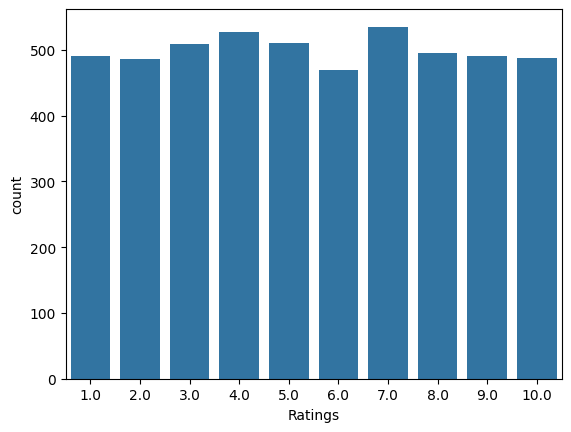

In [17]:
#Checking for Class Imbalance
sns.countplot(x=df1['Ratings'])
plt.show()

### Most important words from Positive words

(-0.5, 1499.5, 799.5, -0.5)

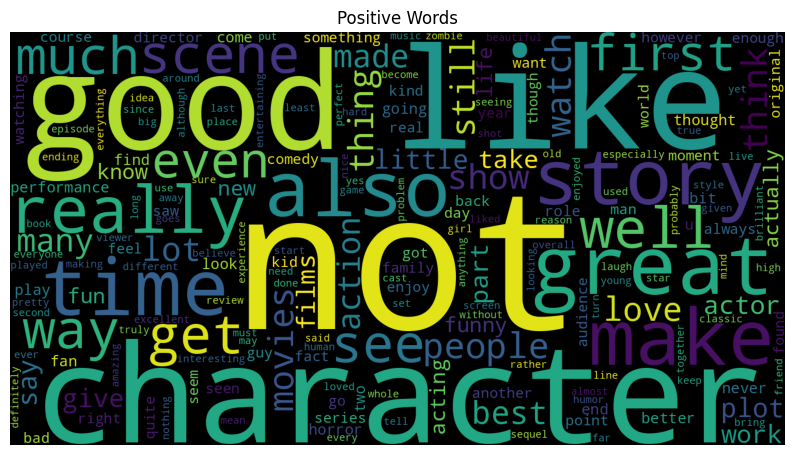

In [19]:
sentences=df1['Reviews_clean']
pos=' '.join(map(str,sentences[df1['Ratings']>=7]))


pos_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Words')
plt.axis('off')

### Most important words from Negative words

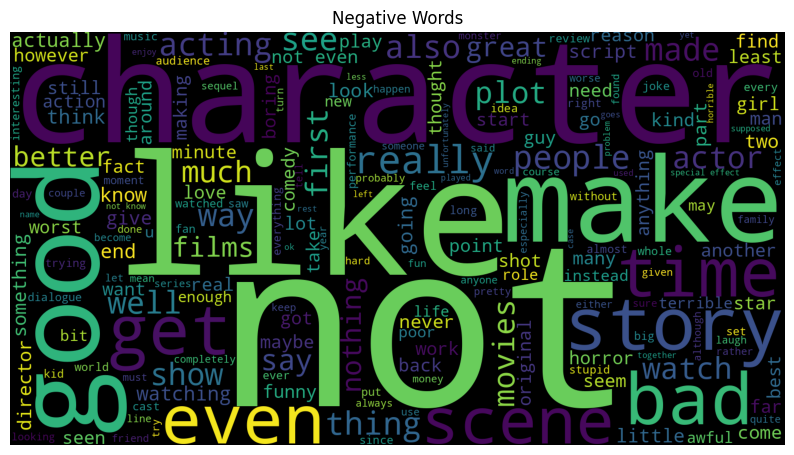

In [20]:
neg=' '.join(map(str,sentences[df1['Ratings']<=4]))

neg_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Words')
plt.axis('off')
plt.show()

### Number of Characters in positive and negative reviews

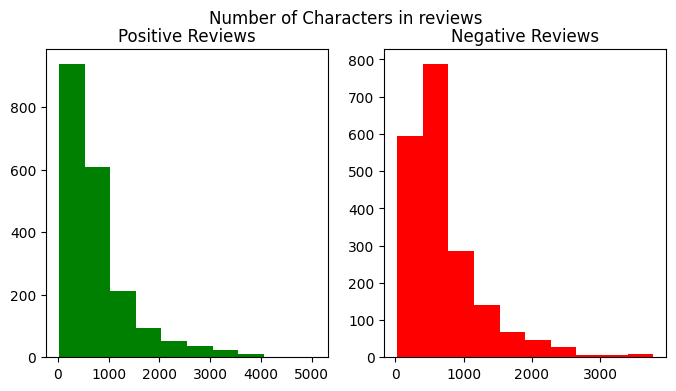

In [ ]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(8,4))
len_pos_review=df1[df1['Ratings']>=7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df1[df1['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

### Number of Words in positive and negative reviews

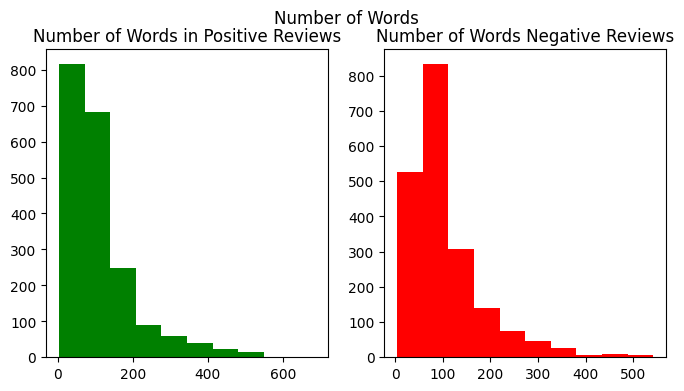

In [ ]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(8,4))
pos_word=df1[df1['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df1[df1['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

### Average number of words in positive and negative reviews

Text(0.5, 0.98, 'Average word length in Reviews')

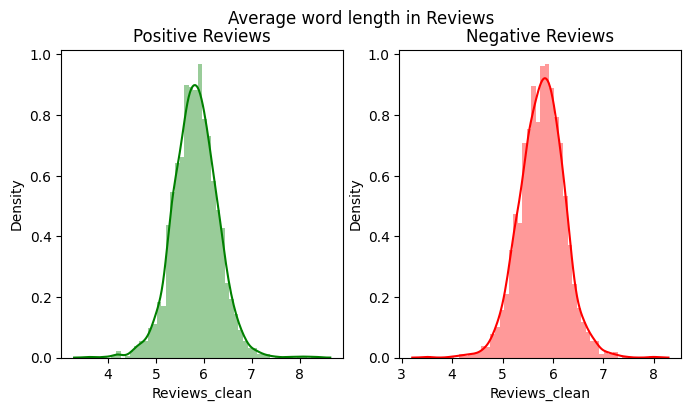

In [ ]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(8,4))
pos_word=df1[df1['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df1[df1['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')


### Applying CountVectorize and Bag of words

* CountVectorizer : it will split a sentence into tokens(i.e. it will generate a list of all the unique words in a sentence).

* Bag of words: It will create a vector arrays based on the count of each word similar to one hot encoding.

In [ ]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Extracting Top 20 unigrams(most occured words) in Positive reviews

It will perform one hot encoding on each sentence **by taking one word at a time** and generate sparse matrix for all the sentences.

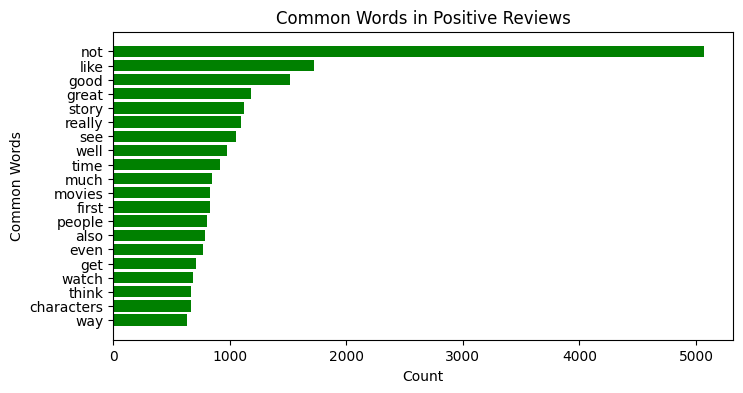

In [ ]:
# Extracting top 20 unigrams (single words) from reviews with ratings >= 7
most_common_uni = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] >= 7], 20, 1)
most_common_uni = dict(most_common_uni)

# Creating a dataframe from the most common Unigrams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='green')
plt.xlabel('Count')
plt.ylabel('Common Words')
plt.title('Common Words in Positive Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common words at the top
plt.show()


# Here "not" came so many times in Positive reviews although it is a negative word because some times not can be use in positive reference

# For Example: "This movie was not bad", "This movie was excellent but I do not like fictional movies"," This was not the

# best movie I watched so far but a very good movie"

### Extracting top 20 bigrams(most occured combination of two words) in Positive reviews

It will perform one hot encoding on each sentence **by taking combination of two words at a time** and generate sparse matrix for all the sentences.

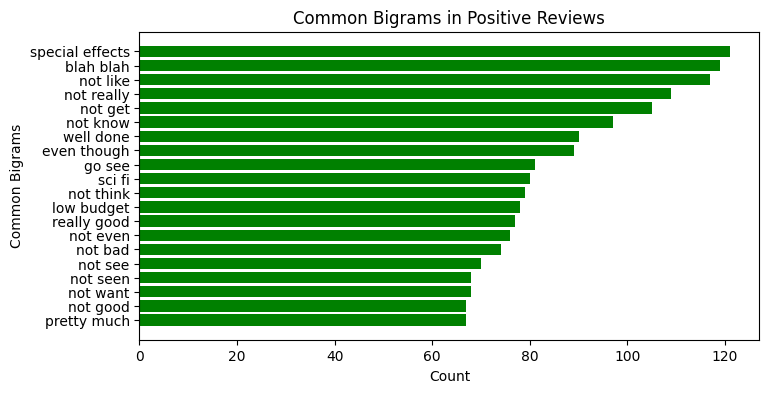

In [ ]:
# Extracting top 20 bigrams(most occured combination of two words) from reviews with ratings >= 7
most_common_bi = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] >= 7], 20, 2)
most_common_bi = dict(most_common_bi)

# Creating a dataframe from the most common bigrams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='green')
plt.xlabel('Count')
plt.ylabel('Common Bigrams')
plt.title('Common Bigrams in Positive Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common bigrams at the top
plt.show()

### Extracting top 20 trigrams(most occured combination of three words) in Positive reviews

It will perform one hot encoding on each sentence **by taking combination of three words at a time** and generate sparse matrix for all the sentences.

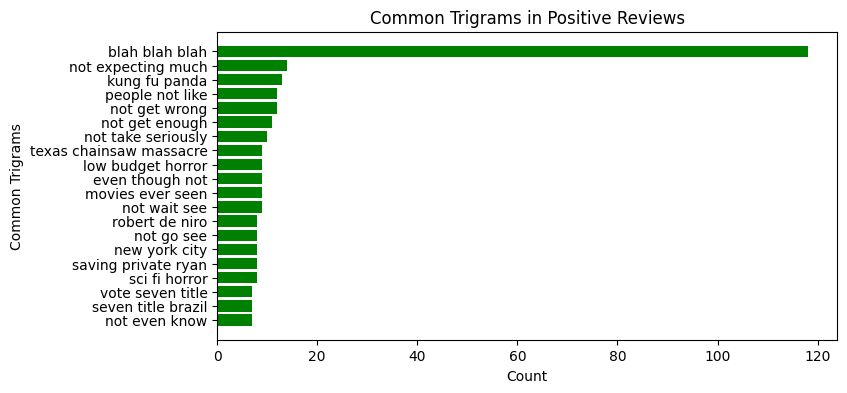

In [ ]:
# Extracting top 20 trigrams(most occured combination of three words) from reviews with ratings >= 7
most_common_tri = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] >= 7], 20, 3)
most_common_tri = dict(most_common_tri)

# Creating a dataframe from the most common trigrams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='green')
plt.xlabel('Count')
plt.ylabel('Common Trigrams')
plt.title('Common Trigrams in Positive Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common trigrams at the top
plt.show()

### Extracting top 20 4-grams in Positive Reviews

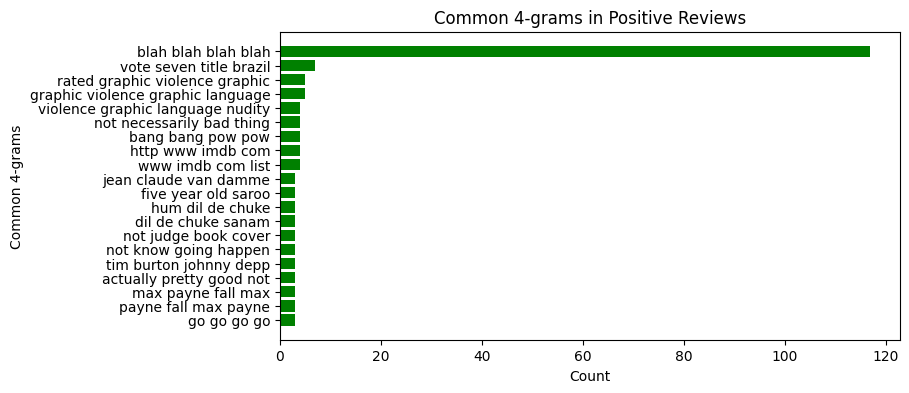

In [ ]:
# Applying 4-grams
# Extracting top 20 4-grams(most occured combination of four words) from reviews with ratings >= 7
most_common_four = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] >= 7], 20, 4)
most_common_four = dict(most_common_four)

# Creating a dataframe from the most common 4-grams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_four.keys())
temp["Count"] = list(most_common_four.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='green')
plt.xlabel('Count')
plt.ylabel('Common 4-grams')
plt.title('Common 4-grams in Positive Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common 4-grams at the top
plt.show()


### Top 20 most occured Unigrams(words) in Negative reviews

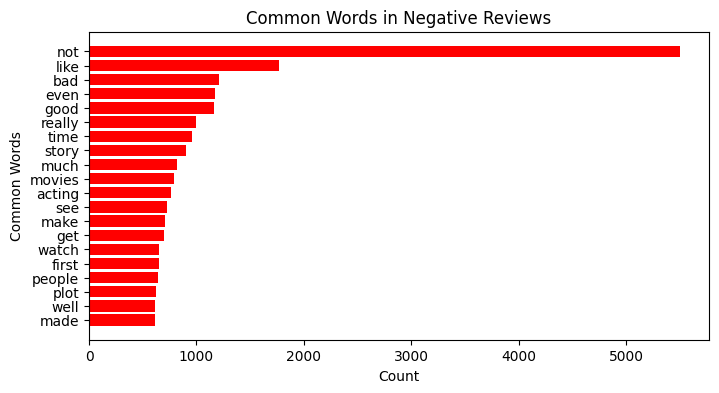

In [ ]:
# Extracting top 20 unigrams (single words) from reviews with ratings <= 4
most_common_uni = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] <= 4], 20, 1)
most_common_uni = dict(most_common_uni)

# Creating a dataframe from the most common Unigrams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='red')
plt.xlabel('Count')
plt.ylabel('Common Words')
plt.title('Common Words in Negative Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common words at the top
plt.show()


### Top 20 most occured bigrams in Negative reviews

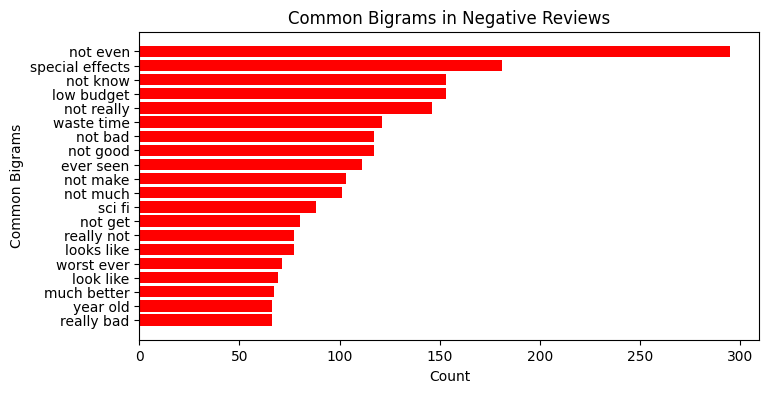

In [ ]:
# Extracting top 20 bigrams(most occured combination of two words) from reviews with ratings <= 4
most_common_bi = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] <= 4], 20, 2)
most_common_bi = dict(most_common_bi)

# Creating a dataframe from the most common bigrams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='red')
plt.xlabel('Count')
plt.ylabel('Common Bigrams')
plt.title('Common Bigrams in Negative Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common bigrams at the top
plt.show()

### Top 20 most occured trigrams in Negative reviews

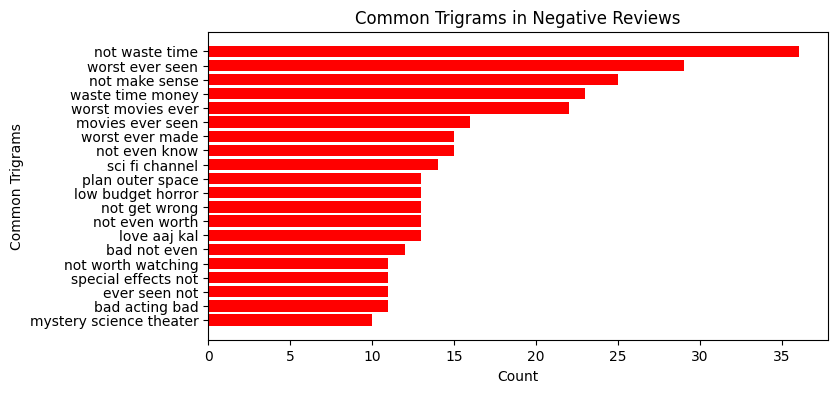

In [ ]:
# Extracting top 20 trigrams(most occured combination of three words) from reviews with ratings <= 4
most_common_tri = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] <= 4], 20, 3)
most_common_tri = dict(most_common_tri)

# Creating a dataframe from the most common trigrams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='red')
plt.xlabel('Count')
plt.ylabel('Common Trigrams')
plt.title('Common Trigrams in Negative Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common trigrams at the top
plt.show()

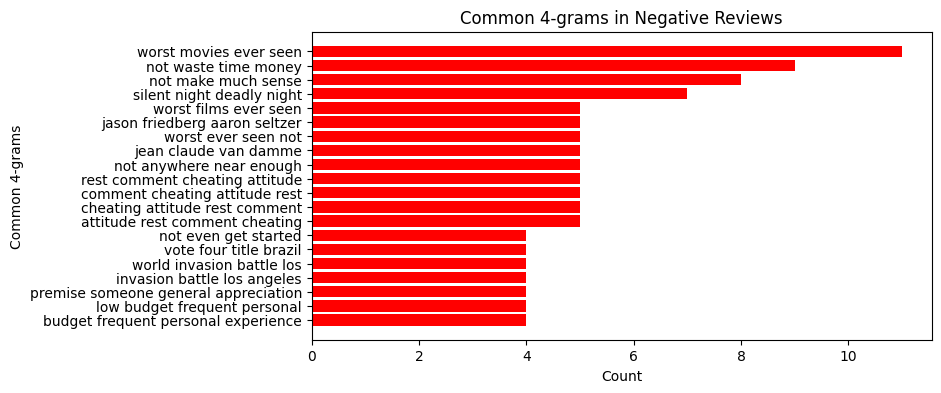

In [ ]:
# Applying 4-grams
# Extracting top 20 4-grams(most occured combination of four words) from reviews with ratings <= 4
most_common_four = get_top_text_ngrams(df1.Reviews_clean[df1['Ratings'] <= 4], 20, 4)
most_common_four = dict(most_common_four)

# Creating a dataframe from the most common 4-grams
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_four.keys())
temp["Count"] = list(most_common_four.values())

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(temp["Common_words"], temp["Count"], color='red')
plt.xlabel('Count')
plt.ylabel('Common 4-grams')
plt.title('Common 4-grams in Negative Reviews')
plt.gca().invert_yaxis()  # Inverting y-axis to have the most common 4-grams at the top
plt.show()


# Feature Engineering

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk import word_tokenize
from nltk.corpus import wordnet

In [ ]:
df2 = df1.copy()

### Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4

In [ ]:
# Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4
df2['Label'] = df2['Ratings'].apply(lambda x: '1' if x >= 7 else '0')
#Removing label < 2
df2=df2[df2.Label<'2']
data=df2[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
1    1976
0    1975
Name: count, dtype: int64


### Applying Word Lemmatization

In [ ]:
 class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

### Creating an instance of CountVectorizer and TfidfVectorizer along with their respective hyperparameters **for Unigrams**

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

### Feature Importance of top 10 most important unigrams(words) using **CountVectorizer** and **Unigrams** using **Logistic Regression**

In [ ]:
# Feature Importance with Logistic Regression and Count Vectorizer with unigram
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

# Feature Importance of top 10 most important unigrams(words) using CountVectorizer

+------------+-----------------------+
|  Feature   |         Score         |
+------------+-----------------------+
|    able    |  0.27928206553968793  |
| absolutely | -0.014365944198614946 |
|    act     |  0.19057439725129027  |
|   acting   |  -0.5994612466773985  |
|   action   |   0.669108497883606   |
|   actor    |  -0.18589974591531003 |
|  actress   |   0.1876870088997031  |
|  actually  |  -0.5327676754424853  |
|    add     |   0.6500417317003061  |
|    age     |  0.11862731862717653  |
|   alien    | -0.042652426260203845 |
+------------+-----------------------+


### Feature Importance of top 10 most important unigrams(words) using **TfIdfVectorizer** and **Unigrams** using **Logistic Regression**

In [ ]:
# Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

# Feature Importance of top 10 most important unigrams(words) using TfIdfVectorizer

+------------+----------------------+
|  Feature   |        Score         |
+------------+----------------------+
|    able    |  0.6549167038872993  |
| absolutely | -0.5229279319432328  |
|    act     | -0.15305500710045386 |
|   acting   | -1.7593121368936786  |
|   action   |  2.6220493564390037  |
|   actor    | -0.8334136304804842  |
|  actress   | -0.38441153003993417 |
|  actually  | -0.7254657424690405  |
|    add     | 0.21818773194060231  |
|    age     | 0.44632437679686304  |
|   alien    | -0.46230638200094565 |
+------------+----------------------+


### Creating an instance of CountVectorizer and TfidfVectorizer along with their respective hyperparameters **for Bigrams**

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

### Feature Importance of top 10 most important bigrams using **CountVectorizer** and **Bigrams** using **Logistic Regression**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

# Feature Importance of top 10 most important bigrams using CountVectorizer

+--------------------+----------------------+
|      Feature       |        Score         |
+--------------------+----------------------+
| absolutely nothing | -0.6145169647615358  |
|      act like      | -0.9056929829656427  |
|     acting bad     | -1.8500572002711375  |
|    acting good     |  0.5009592190028413  |
|    acting great    |  0.7128927273839544  |
|     acting not     | -0.2921569730497837  |
|    acting poor     | -1.2906371761738158  |
|    action movie    |  0.8449343432294087  |
|   action packed    |  1.2305027479281825  |
|    action scene    | -0.19226648638746868 |
|  action sequence   |  0.4983611182993806  |
+--------------------+----------------------+


### Feature Importance of top 10 most important bigrams using **TfIdfVectorizer** and **Bigrams** using **Logistic Regression**

In [ ]:
# Feature Importance with Logistic Regression and TFIDF Vectorizer with bigram
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

# Feature Importance of top 10 most important bigrams using TfIdfVectorizer

+--------------------+---------------------+
|      Feature       |        Score        |
+--------------------+---------------------+
| absolutely nothing |  -0.702606846421552 |
|      act like      | -0.8717093265831791 |
|     acting bad     |  -1.867691461627592 |
|    acting good     |  0.7263614769770601 |
|    acting great    |  0.8899832350656672 |
|     acting not     |  -0.820194676736141 |
|    acting poor     |  -1.340545363951966 |
|    action movie    |  1.078426317077677  |
|   action packed    |  1.3201833176681514 |
|    action scene    |  0.1060159784182268 |
|  action sequence   |  0.4757899636998639 |
+--------------------+---------------------+


### Creating an instance of CountVectorizer and TfidfVectorizer along with their respective hyperparameters **for Trigrams**

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

### Feature Importance of top 10 most important trigrams using **CountVectorizer** and **Trigrams** using **Logistic Regression**

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

# Feature Importance of top 10 most important trigrams using CountVectorizer

+------------------------+------------------------+
|        Feature         |         Score          |
+------------------------+------------------------+
|     acting not bad     |  -0.8543345278211607   |
|     ever seen not      |  -0.44182245465535075  |
|    let start saying    |  -0.22182235704494227  |
| looking forward seeing | -0.0030251645385464205 |
|   low budget horror    |   -0.511617479523711   |
|    movie ever seen     |  0.14907505435111393   |
|      not bad not       |   0.1142001625086291   |
|     not even know      |  -0.3578881397150992   |
|    not expect much     |  -0.3057732620056533   |
|   not expecting much   |   0.5234639453220742   |
|     not get wrong      |  -0.38837235192889114  |
+------------------------+------------------------+


### Feature Importance of top 10 most important trigrams using **TfIdfVectorizer** and **Trigrams** using **Logistic Regression**

In [ ]:
# Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

# Feature Importance of top 10 most important trigrams using TfIdfVectorizer

+------------------------+----------------------+
|        Feature         |        Score         |
+------------------------+----------------------+
|     acting not bad     | -0.8574590623212288  |
|     ever seen not      | -0.44056507049169713 |
|    let start saying    | -0.2970250574859525  |
| looking forward seeing | -0.04887068655426598 |
|   low budget horror    | -0.42113731863024334 |
|    movie ever seen     |  0.1319380530524619  |
|      not bad not       |  0.1160374864042115  |
|     not even know      |  -0.410209548127469  |
|    not expect much     | -0.30403787067263477 |
|   not expecting much   |  0.5900659449439808  |
|     not get wrong      | -0.38608407020740343 |
+------------------------+----------------------+


### Creating an instance of CountVectorizer and TfidfVectorizer along with their respective hyperparameters **for 4-grams**

In [ ]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4), min_df=1,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(4,4),min_df=1,max_features=5000)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

### Feature Importance of top 10 most important 4-grams using **CountVectorizer** and **4-grams** using **Logistic Regression**

In [ ]:
# Feature Importance with Logistic Regression and Count Vectorizer with 4-gram
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

# Feature Importance of top 10 most important 4-grams using CountVectorizer

+---------------------------------+-----------------------+
|             Feature             |         Score         |
+---------------------------------+-----------------------+
| aaaand neither character pretty |  -0.2625494074621422  |
|    absolutely worst ever seen   |  -0.6372356536402101  |
|        act way real life        |  -0.5909399094751026  |
|      acting bad writing bad     |  -0.33536332348932935 |
|   acting cheesy special effect  |  -0.5099801653026602  |
|     acting great camera work    |   0.6275426670075811  |
|      acting not really bad      |  0.18778827569776627  |
|  acting show huge indifference  | -0.011712008907787654 |
|     action basic plot setup     |  0.29166174822134305  |
|  actor coming constantly random | -0.011712008907787654 |
|        actor not best not       |   0.4936955937060681  |
+---------------------------------+-----------------------+


### Feature Importance of top 10 most important 4-grams using **TfIdfVectorizer** and **4-grams** using **Logistic Regression**

In [ ]:
# Feature Importance with Logistic Regression and TDIDF Vectorizer with 4-gram
lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=10:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------------+----------------------+
|             Feature             |        Score         |
+---------------------------------+----------------------+
| aaaand neither character pretty | -0.20010252386432367 |
|    absolutely worst ever seen   | -0.5975263355386252  |
|        act way real life        | -0.5055094177426547  |
|      acting bad writing bad     | -0.30003328145242303 |
|   acting cheesy special effect  | -0.42393108782501837 |
|     acting great camera work    |  0.6000199669392294  |
|      acting not really bad      | 0.24183358998245577  |
|  acting show huge indifference  | -0.04077494897856539 |
|     action basic plot setup     | 0.23206142294696444  |
|  actor coming constantly random | -0.04077494897856539 |
|        actor not best not       |  0.4640647609979919  |
+---------------------------------+----------------------+


### Creating **Instance for Combination of Unigrams, Bigrams and Trigrams**

In [ ]:
# Vectorization with Count Vectorizer and TDIDF Vectorizer with unigram, bigram and trigram
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3), min_df=10,max_features=5000)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=5000)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

# Feature Selection (Using Chi squared test)

In [ ]:
# Feature Selection with Chi squared
from sklearn.feature_selection import chi2
import numpy as np
N = 10
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

1. 0 :
	# Unigrams :
	. poor
	. worse
	. horrible
	. awful
	. amazing
	. terrible
	. waste
	. bad
	. worst
	. great
	# Bigrams :
	. not waste
	. bad acting
	. really bad
	. not worth
	. acting bad
	. well done
	. not make
	. worst ever
	. waste time
	. not even
	# Trigrams :
	. acting not bad
	. ever seen not
	. sci fi channel
	. not worth watching
	. people not like
	. waste time money
	. worst movie ever
	. not waste time
	. worst ever seen
	. not make sense
2. 1 :
	# Unigrams :
	. poor
	. worse
	. horrible
	. awful
	. amazing
	. terrible
	. waste
	. bad
	. worst
	. great
	# Bigrams :
	. not waste
	. bad acting
	. really bad
	. not worth
	. acting bad
	. well done
	. not make
	. worst ever
	. waste time
	. not even
	# Trigrams :
	. acting not bad
	. ever seen not
	. sci fi channel
	. not worth watching
	. people not like
	. waste time money
	. worst movie ever
	. not waste time
	. worst ever seen
	. not make sense


# Model Building and Model Selection

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,roc_auc_score
from nltk import pos_tag
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

## Building Logistic Regression Model

In [ ]:
# Logistic Regression
model_1=LogisticRegression()

### Training Logistic Regression Model

In [ ]:
model_1.fit(x_train_tfidf,y_train)

LogisticRegression()

### Evaluating Logistic Regression Metrics

In [ ]:
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.9493670886075949
AUC Score on training dateset for Logistic Regression: 0.9869981778086186
F1 Score ftraining dateset for Logistic Regression: 0.9493697379502103
Precision Score on test for Logistic Regression: 0.8406408094435076
AUC Score on test for Logistic Regression: 0.9300072891278103
F1 Score for Logistic Regression: 0.8406744838966375


## Building Decision Tree Model

In [ ]:
# Decision Tree Classifier
model_2 = Pipeline(
steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

### Training Decision Tree Model

In [ ]:
model_2.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

### Evaluating Decision Tree Metrices

In [ ]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 1.0
AUC Score on training dateset for Decision Tree Classifier: 1.0
F1 Score training dateset for Decision Tree Classifier: 1.0
Precision Score on test for Decision Tree Classifier: 0.6492411467116358
AUC Score on test for Decision Tree Classifier: 0.6505347258604588
F1 Score for Decision Tree Classifier: 0.6490096918601407


### Building the Decision Tree Classifier Model agin with max depth 11 to fix overfitting

In [ ]:
#Decision Tree Classifier with max depth 11 to fix overfit
model_3 = Pipeline(
    steps=[
        ("classifier", DecisionTreeClassifier( criterion='gini', max_depth=11, min_samples_split=2, min_samples_leaf=1)),
    ]
)

In [ ]:
model_3.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=11))])

# Evaluating the decision tree with max depth 11

In [ ]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_3.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_3.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_3 =f1_score(y_train,model_3.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_3)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_3.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_3.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_3 =f1_score(y_test,model_3.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_3)

Precision Score on training dateset for Decision Tree Classifier: 0.793128390596745
AUC Score on training dateset for Decision Tree Classifier: 0.8890648107736412
F1 Score training dateset for Decision Tree Classifier: 0.7884645501100399
Precision Score on test for Decision Tree Classifier: 0.6829679595278246
AUC Score on test for Decision Tree Classifier: 0.7041041206350653
F1 Score for Decision Tree Classifier: 0.675465736972662


# Building the Random Forest Model

In [ ]:
# Random Forest Classifier
model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

In [ ]:
# Training
model_4.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

## Evaluating Metrics:

In [ ]:
print("Precision Score on training dateset for Random Forest Classifier: %s" % precision_score(y_train,model_4.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Random Forest Classifier: %s" % roc_auc_score(y_train,model_4.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_4 =f1_score(y_train,model_4.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Random Forest Classifier: %s" % f1_score_train_4)
print("Precision Score on test for Random Forest Classifier: %s" % precision_score(y_test,model_4.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Random Forest Classifier: %s" % roc_auc_score(y_test,model_4.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_4 =f1_score(y_test,model_4.predict(x_test_tfidf),average="weighted")
print("F1 Score for Random Forest Classifier: %s" % f1_score_4)

Precision Score on training dateset for Random Forest Classifier: 0.9996433454199608
AUC Score on training dateset for Random Forest Classifier: 0.9999997031851204
F1 Score training dateset for Random Forest Classifier: 0.999643346077805
Precision Score on test for Random Forest Classifier: 0.8145888226320899
AUC Score on test for Random Forest Classifier: 0.8909178953554833
F1 Score for Random Forest Classifier: 0.814554920816977


In [ ]:
# Logistic Regression is giving the best accuracy so we will perform hyperparameter tuning for Logistic Regression

In [ ]:
# Hyperparameter Tunning with Grid Search
from sklearn import model_selection

In [ ]:
def hyperparamtune(classifier, param_grid,metric,verbose_value,cv):
    model=model_selection.GridSearchCV(
            estimator=classifier,
            param_grid=param_grid,
            scoring=metric,
            verbose=verbose_value,
            cv=cv)

    model.fit(x_train_tfidf,y_train)
    print("Best Score %s" % {model.best_score_})
    print("Best hyperparameter set:")
    best_parameters = model.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")
    return model, best_parameters

In [ ]:
# Hyperparameter tunning of Logistic Regression
param_gd={"penalty":["l2","l1"],
         "C":[0.01,0.1,1.0,10],
         "tol":[0.0001,0.001,0.01],
         "max_iter":[100,200]}
model_7, best_param = hyperparamtune(LogisticRegression(),param_gd,"accuracy",5,5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.622 total time=   0.3s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.624 total time=   0.3s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.637 total time=   0.3s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.646 total time=   0.3s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, tol=0.0001;, score=0.637 total time=   0.3s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, tol=0.001;, score=0.622 total time=   0.3s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, tol=0.001;, score=0.624 total time=   0.3s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, tol=0.001;, score=0.637 total time=   0.4s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, tol=0.001;, score=0.646 total time=   0.3s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, tol=0.001;, score=0.637 total time=   0.2s
[CV 1/5] END C=0.01, max_iter=100

In [ ]:
# Evaluation of FineTuned Logisitic Regression Classifier

In [ ]:
print("Precision Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_train,model_7.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_train,model_7.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_7 =f1_score(y_train,model_7.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Finetuned Logsitic Regression Classifier: %s" % f1_score_train_7)
print("Precision Score on test for Finetuned Logsitic Regression Classifier: %s" % precision_score(y_test,model_7.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Finetuned Logsitic Regression Classifier: %s" % roc_auc_score(y_test,model_7.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_7 =f1_score(y_test,model_7.predict(x_test_tfidf),average="weighted")
print("F1 Score for Finetuned Logsitic Regression Classifier: %s" % f1_score_7)

Precision Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9493670886075949
AUC Score on training dateset for Finetuned Logsitic Regression Classifier: 0.9869981778086186
F1 Score training dateset for Finetuned Logsitic Regression Classifier: 0.9493697379502103
Precision Score on test for Finetuned Logsitic Regression Classifier: 0.8406408094435076
AUC Score on test for Finetuned Logsitic Regression Classifier: 0.9300072891278103
F1 Score for Finetuned Logsitic Regression Classifier: 0.8406744838966375


## Our model gave precision score of 84% on test data

In [ ]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

In [ ]:
# Confusion Matrix

def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

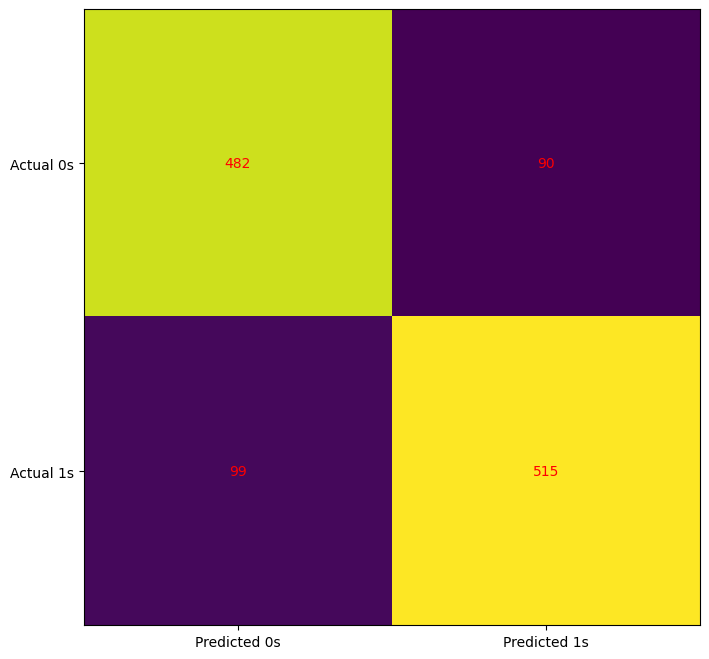

In [ ]:
confusion_matrix_plot(y_test,y_predict)

In [ ]:
# Logistic Regression with best Hyperparameters
lrclf = LogisticRegression(penalty='l2',tol=0.0001,C=1.0,max_iter=100)

In [ ]:
# Training the Logistic Regression model with best hyperparameters
lrclf.fit(x_train_tfidf,y_train)
lrclf1 = lrclf.predict(x_test_tfidf)

 ### Freezing the model using pickle

In [ ]:
dump(tfidfvect, 'vectorizer.joblib')
dump(lrclf, 'modelLogReg.joblib')